In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LINA
from sklearn.linear_model import Lasso

%matplotlib inline

plt.rc("figure", facecolor="white")

params = {
    'lines.markersize' : 10,
    'axes.labelsize': 20,
    'font.size': 20,
    'legend.fontsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'text.usetex': False,
   }
plt.rcParams.update(params)
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]   

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)   


In [2]:
#load numpy data and Descripor list
X = np.loadtxt('../salty/data/salts_with_descriptors')
f = open('../salty/data/Deslist','r')
Deslist = []
for line in f:
    Deslist.append("Cation %s " % line.strip('\n\t'))
f = open('../salty/data/Deslist','r')
for line in f:
    Deslist.append("Anion %s " % line.strip('\n\t'))
Deslist.append("Temperature")
Deslist.append("Pressure")
Deslist.append("Density")

X = X[~np.isnan(X).any(axis=1)]

n = X.shape[0]
d = X.shape[1]
d -= 1
print(n,d)
print(len(Deslist))

(3659, 190)
191


In [3]:
n_train = int(n*0.8)
n_test  = n - n_train
X = np.random.permutation(X)

X_train = np.zeros((n_train,d))
X_test  = np.zeros((n_test,d))
Y_train = np.zeros((n_train))
Y_test = np.zeros((n_test))

X_train[:] = X[:n_train,:-1]
Y_train[:] = np.log(X[:n_train,-1])

X_test[:] = X[n_train:,:-1]
Y_test[:] = np.log(X[n_train:,-1])

print(X_train.shape)
print(X_test.shape)

(2927, 190)
(732, 190)


In [18]:
model = Lasso(alpha=0.0001,tol=1e-10)
model.fit(X_train,Y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=1e-10, warm_start=False)

In [19]:
i=0
for a in range(len(Deslist)-1):
    if model.coef_[a] != 0:
        print(a, Deslist[a])
        i+=1
print(i)

(97, 'Anion BertzCT ')
(98, 'Anion Ipc ')
(102, 'Anion Kappa3 ')
(116, 'Anion MolMR ')
(117, 'Anion MolWt ')
(119, 'Anion HeavyAtomMolWt ')
(128, 'Anion TPSA ')
(129, 'Anion LabuteASA ')
(133, 'Anion PEOE_VSA4 ')
(136, 'Anion PEOE_VSA7 ')
(141, 'Anion PEOE_VSA12 ')
(142, 'Anion PEOE_VSA13 ')
(143, 'Anion PEOE_VSA14 ')
(144, 'Anion SMR_VSA1 ')
(148, 'Anion SMR_VSA5 ')
(153, 'Anion SMR_VSA10 ')
(154, 'Anion SlogP_VSA1 ')
(155, 'Anion SlogP_VSA2 ')
(156, 'Anion SlogP_VSA3 ')
(158, 'Anion SlogP_VSA5 ')
(163, 'Anion SlogP_VSA10 ')
(167, 'Anion EState_VSA2 ')
(174, 'Anion EState_VSA9 ')
(184, 'Anion VSA_EState8 ')
(185, 'Anion VSA_EState9 ')
(188, 'Temperature')
(189, 'Pressure')
27


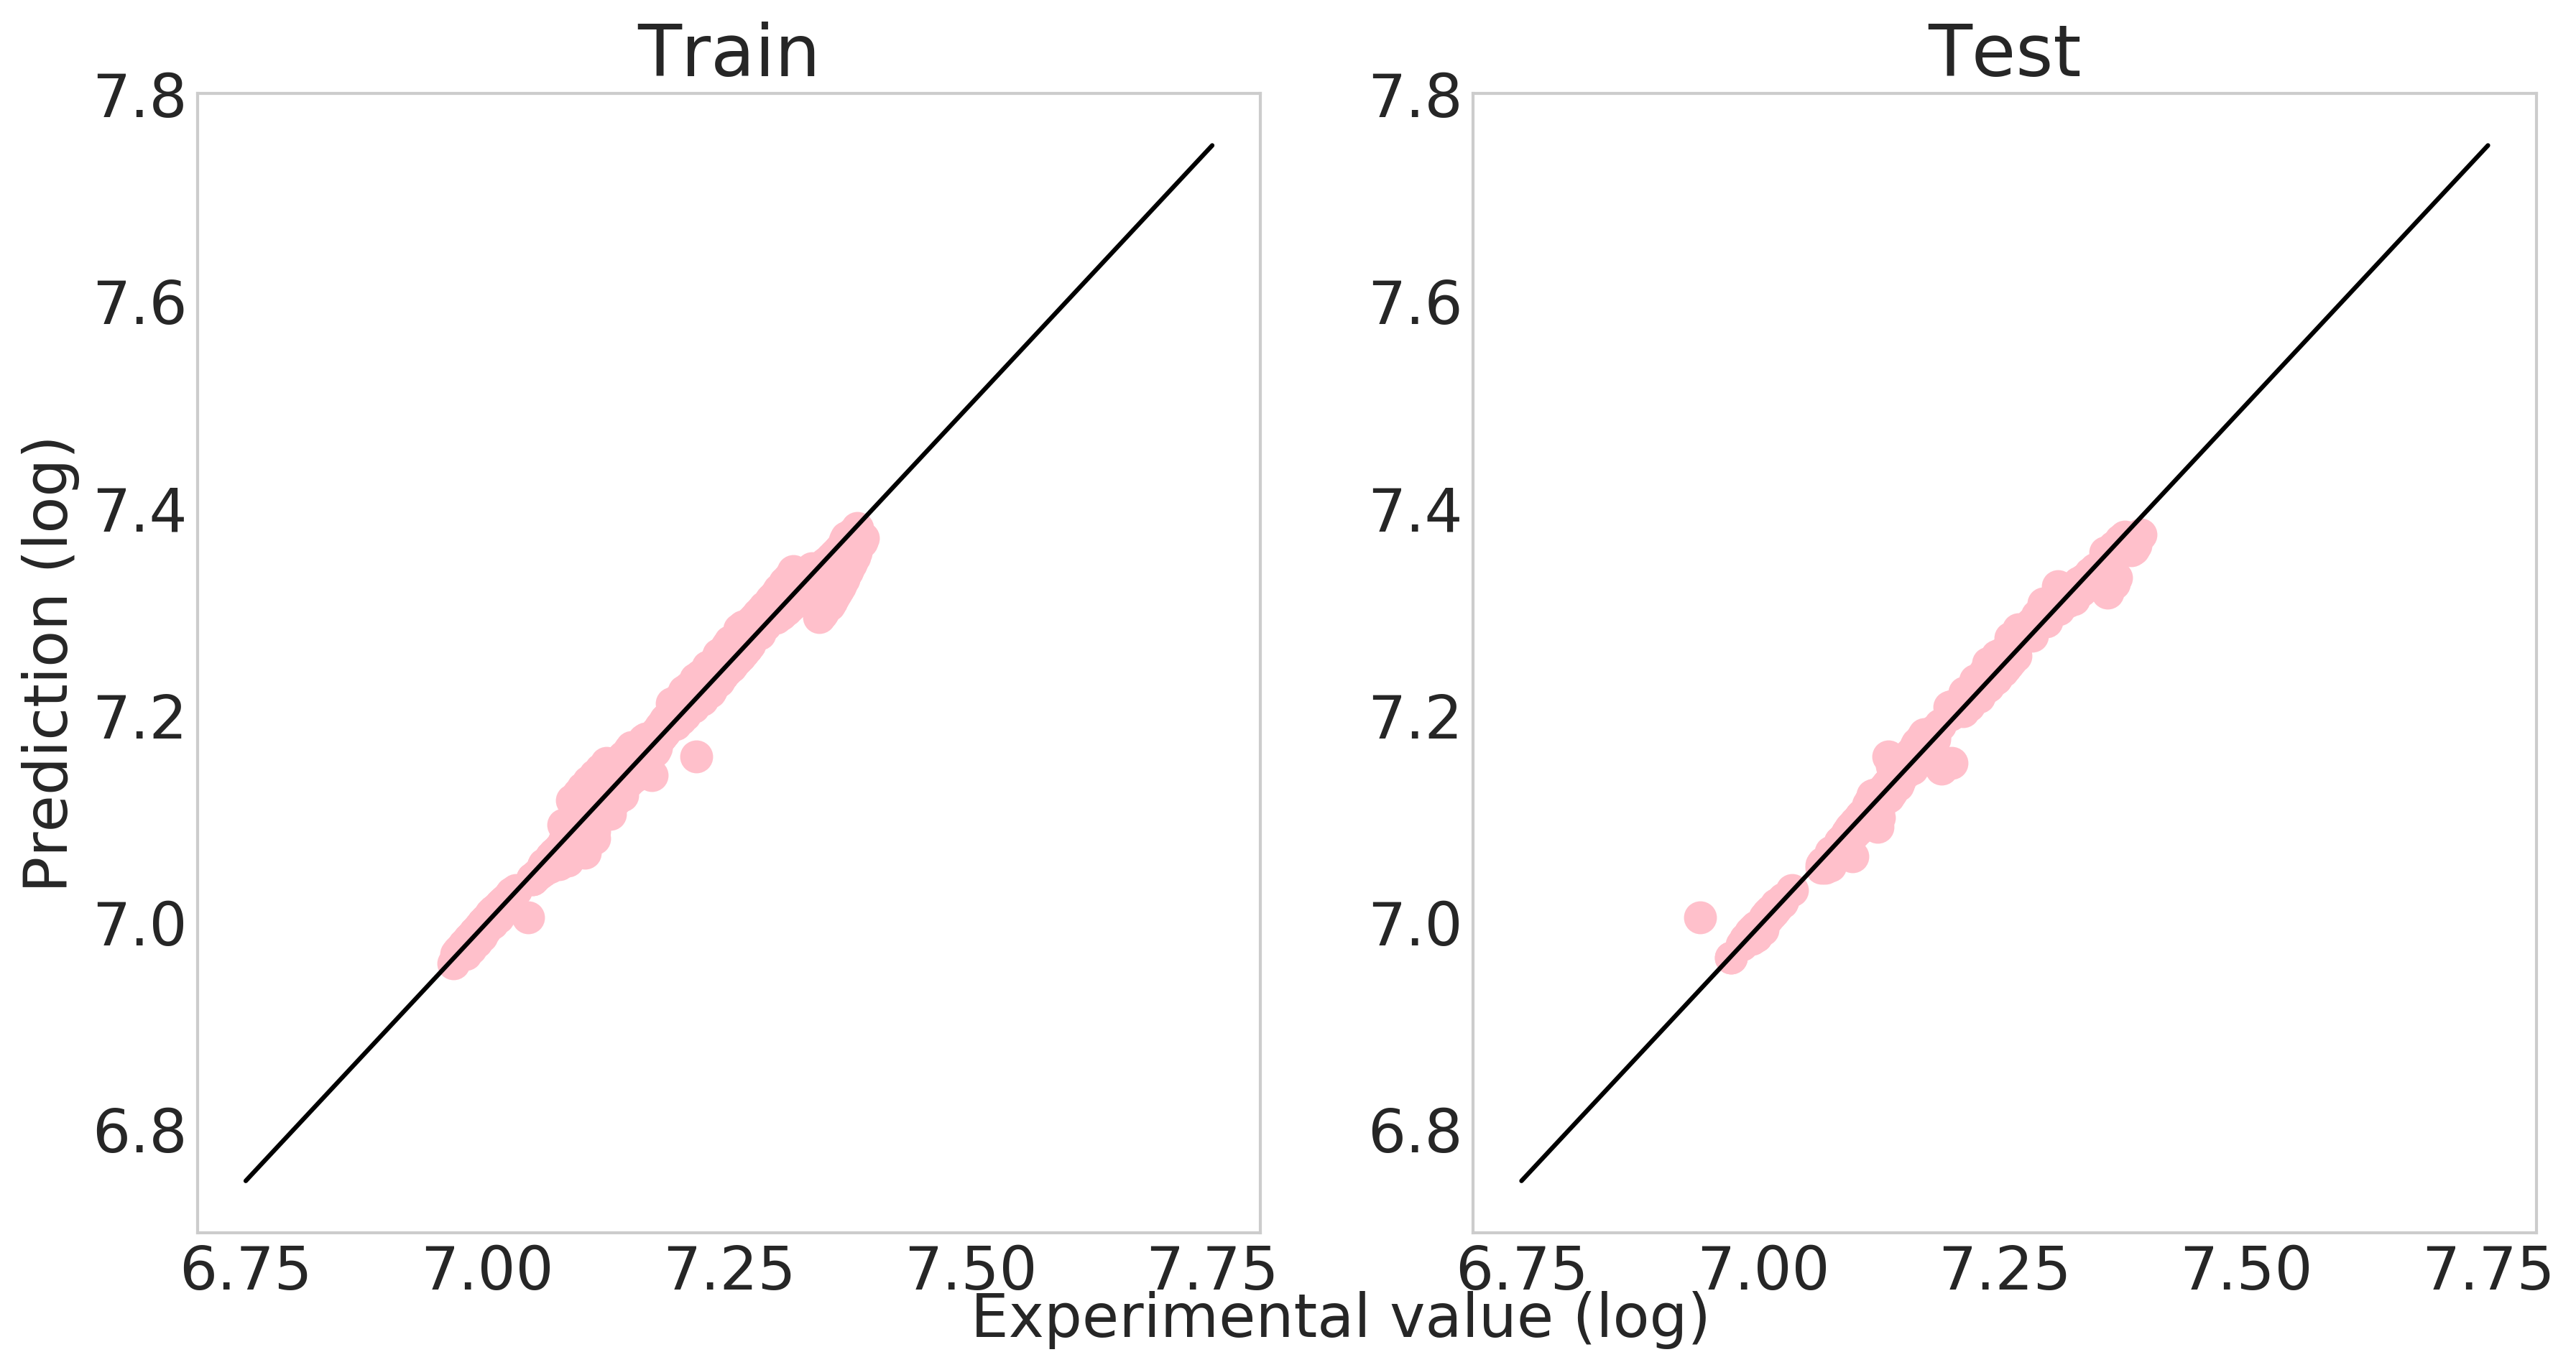

In [21]:
with plt.style.context('seaborn-whitegrid'):
    fig=plt.figure(figsize=(14,7), dpi=300)
    ax = fig.add_subplot(121)
    ax.plot(Y_train,model.predict(X_train),"o",color = "pink")
    ax.plot(np.arange(6.75,7.75,0.0001),np.arange(6.75,7.75,0.0001),color = 'black')
#     ax.axis([-6,1,-6,1])
#     plt.xlim(-6,-1)
#     plt.ylim(-6,-1)
    plt.text(7.5,6.6,'Experimental value (log)')
    plt.ylabel('Prediction (log)')
    plt.title('Train')
    plt.grid(False)
    ax2 = fig.add_subplot(122)
    ax2.plot(Y_test,model.predict(X_test),"o",color = "pink")
    ax2.plot(np.arange(6.75,7.75,0.0001),np.arange(6.75,7.75,0.0001),color = 'black')
#     ax2.axis([-6,1,-6,1])
#     plt.xlim(-6,-1)
#     plt.ylim(-6,-1)
    plt.title('Test')
    plt.grid(False)